In [1]:
import yfinance as yf
import pandas as pd
stock_df = pd.read_csv('stock_list.csv')
stock_df.head()
data = pd.DataFrame()
for ticker in stock_df.Symbols[:20]:
    data[ticker] = yf.download(ticker,'2018-1-1','2019-12-31')['Adj Close']
data.head()
data.to_csv('pca.csv')

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/Users/dan/miniforge3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/dan/miniforge3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dan/miniforge3/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/dan/miniforge3/lib/python3.9/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/dan/miniforge3/lib/python3.9/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/dan/miniforge3/lib/python3.9/site-packages/yfinance/base.py", line 295, in history
    df.index = df.index.tz_localize("UTC").tz_convert(
AttributeError: 'Index' object has no attribute 'tz

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv("pca.csv",index_col=0)
df.head()

In [26]:
data_daily_returns = df.pct_change()
data_daily_returns.dropna(inplace=True)
data_daily_returns.head()

,GOOG,GOOGL,AMZN,MA,BA,C,ABT,CRM,COST,ACN,AVGO,MMM,CVS,FIS,SYK,MDLZ,CI,CME,ISRG,COP
Date,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.016413,0.017061,0.012775,0.012579,0.003233,0.003110,0.002289,0.008428,0.012029,0.004624,0.010920,-0.000045,-0.004341,0.005900,0.005633,0.003941,0.016793,0.016022,0.022838,0.018435
2018-01-04,0.003621,0.003884,0.004476,0.012949,-0.003783,0.012260,-0.001757,0.013202,-0.007764,0.011806,0.000357,0.013060,0.026304,0.007386,-0.000322,0.002453,0.005246,0.010680,-0.017977,0.011452
2018-01-05,0.014571,0.013260,0.016163,0.020764,0.040997,-0.001253,0.002816,0.013311,-0.007177,0.008306,0.005915,0.007779,0.044180,0.005715,0.014621,0.012726,0.016961,0.006525,0.005545,-0.001826
2018-01-08,0.004273,0.003531,0.014425,0.002988,0.004256,-0.011709,-0.002808,0.007031,0.003913,0.007976,0.002368,-0.003220,-0.008679,0.002466,0.013648,-0.005075,-0.011072,0.013881,0.033904,0.010062
2018-01-09,-0.000614,-0.001274,0.004676,0.001458,0.026704,0.010437,0.001760,0.002664,-0.011640,0.003308,-0.013820,0.006195,-0.000958,0.003316,-0.015155,-0.000486,-0.001682,0.005977,0.014648,0.008151


In [27]:
data_daily_returns.shape

(501, 20)

In [32]:
from sklearn.decomposition import PCA
N_PRIN_COMPONENTS = 18
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(data_daily_returns)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
X = pca.components_.T
X.shape

(20, 18)

In [34]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

from statsmodels.tsa.stattools import coint
X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(20, 18)


In [54]:
clf = KMeans(n_clusters=4, init='k-means++', max_iter=30, n_init=10, random_state=7)
print(clf)

clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=30,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

Clusters discovered: 4


In [55]:
clustered_series = pd.Series(index=data_daily_returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=data_daily_returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [56]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

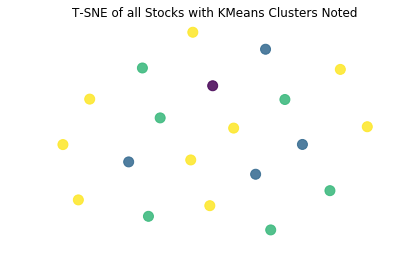

In [57]:
import matplotlib.pyplot as plt
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1]
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with KMeans Clusters Noted');